# Data Exploration and Analysis


I will import data of the three cameras with distinc perspective among them. So, I am going to import each subset and analize its features. In the next cell I am going to import the data given by Udacity mixed with others that I recorded which is contained in [Here](). 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


dataset = pd.read_csv('data/data.csv', usecols=[0, 1, 2, 3])
# visualize the first and last 5 elements of the data.
dataset.head()


,center,left,right,steering
0,IMG/center_2016_12_01_13_32_43_457.jpg,IMG/left_2016_12_01_13_32_43_457.jpg,IMG/right_2016_12_01_13_32_43_457.jpg,0.061760
1,IMG/center_2016_12_01_13_32_43_558.jpg,IMG/left_2016_12_01_13_32_43_558.jpg,IMG/right_2016_12_01_13_32_43_558.jpg,0.052191
2,IMG/center_2016_12_01_13_32_43_659.jpg,IMG/left_2016_12_01_13_32_43_659.jpg,IMG/right_2016_12_01_13_32_43_659.jpg,0.052191
3,IMG/center_2016_12_01_13_32_43_761.jpg,IMG/left_2016_12_01_13_32_43_761.jpg,IMG/right_2016_12_01_13_32_43_761.jpg,0.367953
4,IMG/center_2016_12_01_13_32_43_862.jpg,IMG/left_2016_12_01_13_32_43_862.jpg,IMG/right_2016_12_01_13_32_43_862.jpg,0.578461


In [2]:
dataset.tail()

,center,left,right,steering
12196,/root/Desktop/data2/Lap5Track2MiddleStr/IMG/ce...,/root/Desktop/data2/Lap5Track2MiddleStr/IMG/le...,/root/Desktop/data2/Lap5Track2MiddleStr/IMG/ri...,0.0
12197,/root/Desktop/data2/Lap5Track2MiddleStr/IMG/ce...,/root/Desktop/data2/Lap5Track2MiddleStr/IMG/le...,/root/Desktop/data2/Lap5Track2MiddleStr/IMG/ri...,0.0
12198,/root/Desktop/data2/Lap5Track2MiddleStr/IMG/ce...,/root/Desktop/data2/Lap5Track2MiddleStr/IMG/le...,/root/Desktop/data2/Lap5Track2MiddleStr/IMG/ri...,0.0
12199,/root/Desktop/data2/Lap5Track2MiddleStr/IMG/ce...,/root/Desktop/data2/Lap5Track2MiddleStr/IMG/le...,/root/Desktop/data2/Lap5Track2MiddleStr/IMG/ri...,0.0
12200,/root/Desktop/data2/Lap5Track2MiddleStr/IMG/ce...,/root/Desktop/data2/Lap5Track2MiddleStr/IMG/le...,/root/Desktop/data2/Lap5Track2MiddleStr/IMG/ri...,0.0


In [3]:
print(dataset.keys())

Index(['center', 'left', 'right', 'steering'], dtype='object')


To the purpose of this project, I will focus on the `steering` gotten respect to each image. Furthermore, the simulating car has three cameras. Each one ubicated in the front of the car but with a little distance among them so, each image captured has a different perspective of the road.

## Getting more data

The data was obtained by defferent ways of driving. It means, one record is a simulation centered on keeping the car in the middle of the lane lines. Other consists of the same method before mentioned but the track was driven in the opposite direction. Alse, there are scenes where the car is falling off the track so it must come back the middle. Finally, one part are just curves of the track and the record on was made slower.

Moreover, the simulation has two different tracks. The first one is a simple circular racetrack. Nevertheless, the second one is harder than the first one because of the track was made in a mountain place so, the track has steeper road and it is a winding track.


In [4]:
from urllib.request import urlretrieve
import os
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from zipfile import ZipFile

def download_uncompress(url, file, name):
    if not os.path.isfile(file):
        print("Download file... " + file + " ...")
        urlretrieve(url,file)
        print("File downloaded")
    if(os.path.isdir(file)):
        print('Data extracted')
    else:
        with ZipFile(dir) as zipf:
            zipf.extractall(name)
#the dataset provided by udacity
#download('----------','remain_data.zip','remain_data') 


## Histogram

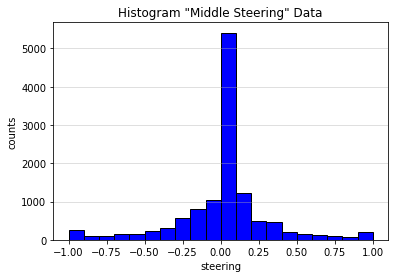

size of data: 36603  images


In [5]:
# the first data (data.zip) correspond to making a lap in the easiest track but focusing on keeping the car on the middle
#plt.figure(figsize)
#hist1 = df['steering']
dataset['steering'].plot.hist( bins = 20, align='mid', color = 'blue', edgecolor = 'black')
plt.title('Histogram "Middle Steering" Data')
plt.xlabel('steering')
plt.ylabel('counts')
plt.grid(axis='y', alpha=0.5)
plt.savefig('README_IMAGES/histogram1.jpg', transparent= False, bbox_inches='tight', pad_inches=0)
plt.show()
plt.close()
print('size of data:', dataset['steering'].count()*3,' images')

How you can see the above histograms, there are bias in each one due to the steering was zero in most the images. This is expected since the goal is keeping the car between the lane lines. But this biased distribution conduce getting wrong accuracy of the CNN. So I am going to reduce the quantity of the zero-steering images in order to get better-distributed data set.

## Reducing Bias and Augmenting Data

Notice that each line of Pandas frame has three images which correspond to left, center and right camera on the car.

In [6]:
dataset = dataset[dataset['steering'] !=0].append(dataset[dataset['steering'] == 0].sample(frac=0.5))
'''I am going to save the max index that has the first dataset since this has the different root of images
respect to the others images dataset'''
#dataset.to_csv(r'./data/remain_data.csv',index= None, header=True)
print('size of total data:', dataset['steering'].count()*3,' images\n')


size of total data: 30162  images



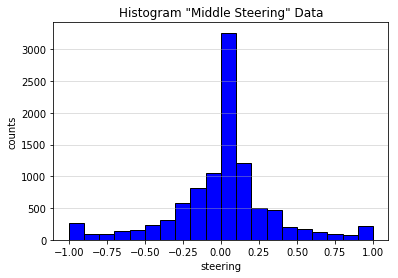

In [7]:
dataset['steering'].plot.hist( bins = 20, align='mid', color = 'blue', edgecolor = 'black')
plt.title('Histogram "Middle Steering" Data')
plt.xlabel('steering')
plt.ylabel('counts')
plt.grid(axis='y', alpha=0.5)
plt.savefig('README_IMAGES/histogramTotal.jpg', transparent= False, bbox_inches='tight', pad_inches=0)
plt.show()
plt.close()

Now, you can see that the distribution of data is less biased.

In [8]:
import cv2 
#this function flip out image passed by parameter
def flip_image(img):
    out = cv2.flip(img,1)
    return out


#this function change the brightness image passed by parameter
#the V in HSV for Value: the perception of the ammount of light or power of the source.
def brightness_change(img):
    out = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    out = np.array(out, dtype = np.float64)
    out[:,:,2] = out[:,:,2]*(.25+np.random.random())
    out = np.uint8(out)
    out_f = cv2.cvtColor(out, cv2.COLOR_HSV2RGB)
    return  out_f

#correct steering to left and right image
def steering(position,steering):
    if position == 'left':
        steering = steering+0.25
    else:
        steering = steering-0.25
    return steering
    

## Visualize data and augmented data

Here, I will show you six images and its corresponding variations.

In [9]:
from matplotlib.image import imread
# Read data
sample = []
label = []
# get 3 images path from firts dataset
for index, row in dataset.iterrows(): 
    if index == 0:
        row[0] = row[0].split('/')[-1]
        row[1] = row[1].split('/')[-1]
        row[2] = row[2].split('/')[-1]        
        sample.append(row[0])
        label.append(row[3])
        sample.append(row[1])
        label.append(steering('left',row[3]))
        sample.append(row[2])
        label.append(steering('right',row[3]))
        #save label to brightness image
        label.append(row[3])
        label.append(steering('left',row[3]))
        label.append(steering('right',row[3]))
        #save label to flip image
        label.append(row[3]*-1)
        label.append(steering('left',row[3])*-1)
        label.append(steering('right',row[3])*-1)
    else:
        break
sample_temp = np.array(sample)
sample_temp = np.hstack((sample_temp,sample_temp, sample_temp))
example_test = np.column_stack((sample_temp ,np.array(label)))
print(pd.DataFrame(example_test), '\n')




                                    0                     1
0  center_2016_12_01_13_32_43_457.jpg   0.06175990000000001
1    left_2016_12_01_13_32_43_457.jpg   0.31175990000000003
2   right_2016_12_01_13_32_43_457.jpg            -0.1882401
3  center_2016_12_01_13_32_43_457.jpg   0.06175990000000001
4    left_2016_12_01_13_32_43_457.jpg   0.31175990000000003
5   right_2016_12_01_13_32_43_457.jpg            -0.1882401
6  center_2016_12_01_13_32_43_457.jpg  -0.06175990000000001
7    left_2016_12_01_13_32_43_457.jpg  -0.31175990000000003
8   right_2016_12_01_13_32_43_457.jpg             0.1882401 



In [10]:
# get images
name = './data/IMG/'
images_set_orig = []
images_set_flip = []
images_set_brightness = []

con_lbl = 0
for row in sample:
    img = imread(name+row)
    images_set_orig.append(img)
    img2 = brightness_change(img)
    images_set_brightness.append(img2)
    flip_img = flip_image(img)
    images_set_flip.append(flip_img)
            
print(pd.DataFrame(label))    

         0
0  0.06176
1  0.31176
2 -0.18824
3  0.06176
4  0.31176
5 -0.18824
6 -0.06176
7 -0.31176
8  0.18824


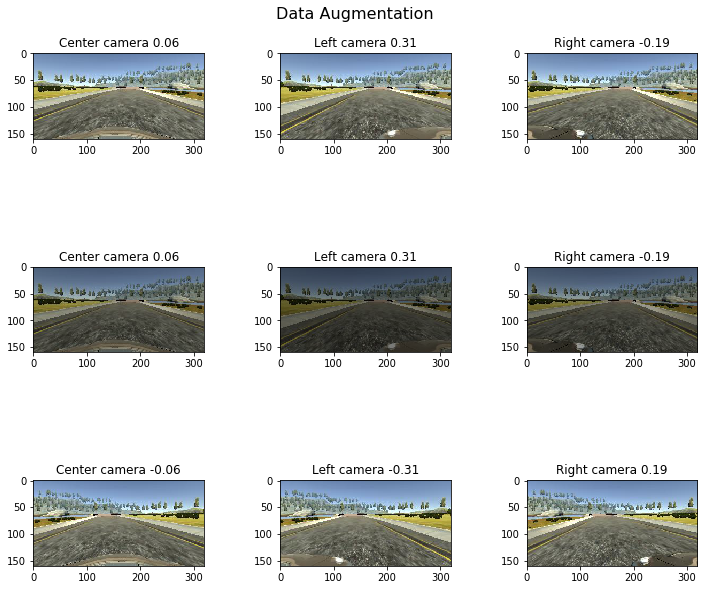

In [18]:
images_set_orig = np.array(images_set_orig)
images_set_brightness = np.array(images_set_brightness)
images_set_flip = np.array(images_set_flip)

cont1 = 0
cont2 = 0
cont3 = 0
lbl_title = 0
f, ax = plt.subplots(3,3,figsize=(12,8))
f.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)
f.suptitle('Data Augmentation', fontsize = 16)
f.subplots_adjust(top=0.90)
for row in range(3):
    for col in range(3):
        if row == 0:
            ax[row, col].imshow(images_set_orig[cont1])
            cont1 += 1
        elif row == 1:
            ax[row, col].imshow(images_set_brightness[cont2])
            cont2 += 1
        else:
            ax[row, col].imshow(images_set_flip[cont3])
            cont3 += 1
        if col == 0:
            ax[row,col].set_title('Center camera %.2f' % label[lbl_title])
        elif col == 1:
            ax[row,col].set_title('Left camera %.2f' % label[lbl_title])
        else:
            ax[row,col].set_title('Right camera %.2f' % label[lbl_title])
        lbl_title += 1
f.savefig('README_IMAGES/DataAug.jpg', transparent= False, bbox_inches='tight', pad_inches=0)

This project focused on obtaining the data set through a simulator. The simulator consists of a vehicle that drives on two tracks. One easier than the other. The simulator has two modes of use. The first is to obtain data to train the model. The second is to test the model trained previously. The was provided by Udacity, you can find the repository [here](https://github.com/udacity/self-driving-car-sim)

**Behavioral Cloning Project**

The model.py file contains the code for training and saving the convolution neural network. The next [notebook](./DataExploration.ipynb) shows the pipeline I used for training and validating the model, and it contains comments to explain how the code works.